# ENAP - Especialização em Ciências de Dados aplicadas a Políticas Públicas - ECaP.
### Disciplina: D6 - Estatística Descritiva
### Professor: Eduardo Gomes
### Aluno: Tulio Conrado Campos da Silva
## Trabalho Final

## Introdução

Os dados em foco para o trabalho proposto são de planejamento e execução orçamentárias, advindos do SIAFI, para o Programa Temático do PPA 2016-2019 referente ao Programa Espacial Brasileiro. Ele concentra todos o orçamento planejado e o efetivamente executado para os principais projetos referentes a satélites, veículos lançadores e manutenção da infraestrutura espacial em solo (centros de lançamento, laboratórios, centros de operação, etc), bem como investimentos em capacitação, contratos com transferência de tecnologia e P&D.

Que conclusões podemos tirar a partir da análise descritiva dos dados do último PPA do Programa Espacial? Essas informações poderão ajudar na execução do próximo ciclo. Alguns projetos, que continuam no atual ciclo do PPA (2020-2023), poderão se beneficiar com informações extraídas dessa análise. Mais especificamente, para esse trabalho, trabalharemos o orçamento planejado e o orçamento efetivamente pago, comparando, de forma simplificada, quanto do Programa Espacial Brasileiro planejado foi executado nesse período.

## Extração e limpeza dos dados

Os dados são referentes aos valores, em reais, relativos a ações orçamentárias do programa temático do Programa Espacial Brasileiro, no Plano Plurianual de 2016 a 2019. Esses valores planejados e executados são qualificados por diversas variáveis, como tempo, natureza da despesa realizada, detalhes do fornecedor que recebeu o recurso e que tipo de serviço foi realizado, quando o dado estiver disponível.

Os dados foram coletados do sistema SIGA Brasil, módulo Especialista, por meio de consulta construída no sistema Micro Strategy. Os dados foram pré-tratados na consulta construída, com inserção de zeros no lugar de valores vazios.

In [90]:
import pandas as pd
import matplotlib.pyplot as plt

# dados de orçamento do PPA 2016-2019 para o Programa Espacial Brasileiro.
dados = pd.read_csv("https://raw.githubusercontent.com/zabife/enap_ecap_d6/main/data.csv",
sep = ";",
decimal = ",",
low_memory = False,
encoding = "iso8859_16")

# # medida resumo (media)
# print(dados["VlrTUSDConvencional"].mean())
# # medias separadas para cada tipo de concessao
# print(dados.groupby("nomConcessao")["VlrTUSDConvencional"].mean())
# # medias separadas para cada regiao
# print(dados.groupby("SigRegiao")["VlrTUSDConvencional"].mean())
# # medias separadas para cada tipo de concessao e regiao
# print(dados.groupby(["nomConcessao","SigRegiao"])["VlrTUSDConvencional"].mean())

# # medida resumo (mediana)
# print(dados["VlrTUSDConvencional"].median())
# # medias separadas para cada tipo de concessao
# print(dados.groupby("nomConcessao")["VlrTUSDConvencional"].median())
# # medias separadas para cada regiao
# print(dados.groupby("SigRegiao")["VlrTUSDConvencional"].median())
# # medias separadas para cada tipo de concessao e regiao
# print(dados.groupby(["nomConcessao","SigRegiao"])["VlrTUSDConvencional"].median())

# # quantis e percentis

# # exemplo 1: percentil 10%
# print(dados["VlrTUSDConvencional"].quantile(.1))
# # exemplo 2: 1o quartil (25%)
# print(dados["VlrTUSDConvencional"].quantile(.25))

# fig, ax = plt.subplots()
# dados["SigRegiao"].value_counts().plot.bar(color=["blue", "#ff4000", "yellow", "silver", "gold"])
# ax.set_ylabel("Contagem")
# ax.set_xlabel("Região")
# ax.set_ylim(0,100)
# plt.show()

# dados["SigRegiao"].value_counts().plot.pie()
# ax.set_ylabel("Contagem")
# ax.set_xlabel("Região")
# plt.show()

## Descrição abreviada dos dados

Os dados são compostos de 21 variáveis quantitativas e 45 qualitativas descritivas.

Para esse trabalho, consideraremos as variáveis quantitativas de "Projeto de Lei", ou seja, os valores planejados para as ações do Programa Espacial, e "Pago", ou seja, os valores efetivamente executados.

In [91]:
print(dados.head())
print(dados["PL"].describe())
print(dados["Pago"].describe())

                Nome Universo Data Atualizaçăo Dados Mês/Ano (12/2009)  \
0  LOA2016 - Despesa Execuçăo    2016/12/31 00:00:00           02/2016   
1  LOA2016 - Despesa Execuçăo    2016/12/31 00:00:00           12/2016   
2  LOA2016 - Despesa Execuçăo    2016/12/31 00:00:00           08/2016   
3  LOA2016 - Despesa Execuçăo    2016/12/31 00:00:00           05/2016   
4  LOA2016 - Despesa Execuçăo    2016/12/31 00:00:00           01/2016   

  Localidade.Regiăo  Localidade.UF Localidade.Localidade  \
0          NACIONAL  NĂO APLICÁVEL              NACIONAL   
1          NACIONAL  NĂO APLICÁVEL              NACIONAL   
2          NACIONAL  NĂO APLICÁVEL              NACIONAL   
3          NACIONAL  NĂO APLICÁVEL              NACIONAL   
4          NACIONAL  NĂO APLICÁVEL              NACIONAL   

   Localidade.Localidade.Localidade (Cod) Localidade (Tipo)  \
0                                 9000000          NACIONAL   
1                                 9000000          NACIONAL   
2    

### Planejamento do orçamento por ano (LOA)

KeyError: 'Ano'

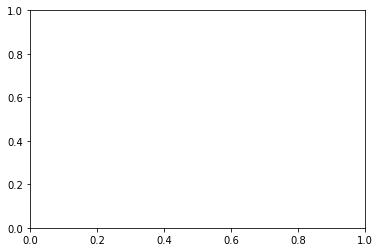

In [92]:
fig , ax = plt.subplots()
dados.groupby("Ano")["PL"].sum().plot.bar()
ax.set_ylabel("Projeto de Lei (Reais)")
ax.set_xlabel("Ano")
plt.show()

### Planejamento do orçamento por Natureza da Despesa

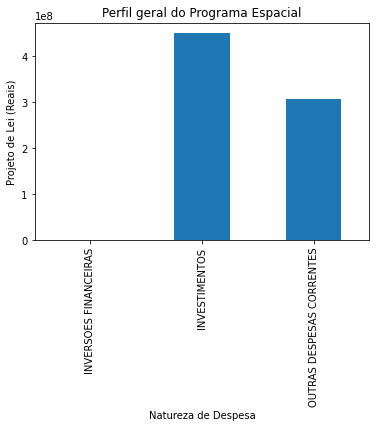

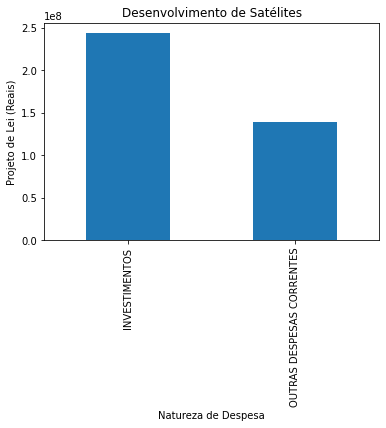

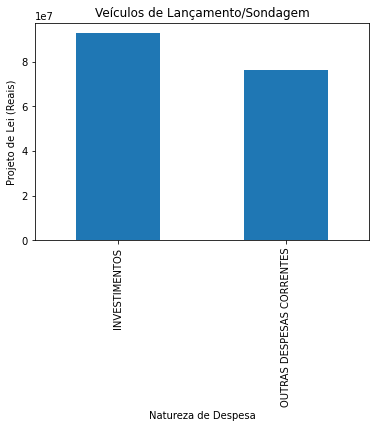

In [88]:
fig , ax = plt.subplots()
dados.groupby("GND")["PL"].sum().plot.bar()
ax.set_ylabel("Projeto de Lei (Reais)")
ax.set_xlabel("Natureza de Despesa")
ax.set_title("Perfil geral do Programa Espacial")
plt.show()

# Para projetos de desenvolvimento de satélites

dados_20VC = dados[(dados["Açăo (Cod/Desc)"] == '20VC - DESENVOLVIMENTO, LANCAMENTO E OPERACAO DE SATELITES, COM A I')]
fig , ax = plt.subplots()
dados_20VC.groupby("GND")["PL"].sum().plot.bar()
ax.set_ylabel("Projeto de Lei (Reais)")
ax.set_xlabel("Natureza de Despesa")
ax.set_title("Desenvolvimento de Satélites")
plt.show()

# Para projetos de desenvolvimento de veículos de lançamento / sondagem

dados_20V0 = dados[(dados["Açăo (Cod/Desc)"] == '20V0 - DESENVOLVIMENTO E LANCAMENTO DE FOGUETES SUBORBITAIS E DE VE')]
fig , ax = plt.subplots()
dados_20V0.groupby("GND")["PL"].sum().plot.bar()
ax.set_ylabel("Projeto de Lei (Reais)")
ax.set_xlabel("Natureza de Despesa")
ax.set_title("Veículos de Lançamento/Sondagem")
plt.show()

## Execução do Programa Espacial

Obs.: Para simplificar a leitura do gráfico, separamos por ano.

Text(0, 0.5, 'Favorecidos')

/home/tulio/.local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 26 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/tulio/.local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 26 missing from current font.
  font.set_text(s, 0, flags=flags)


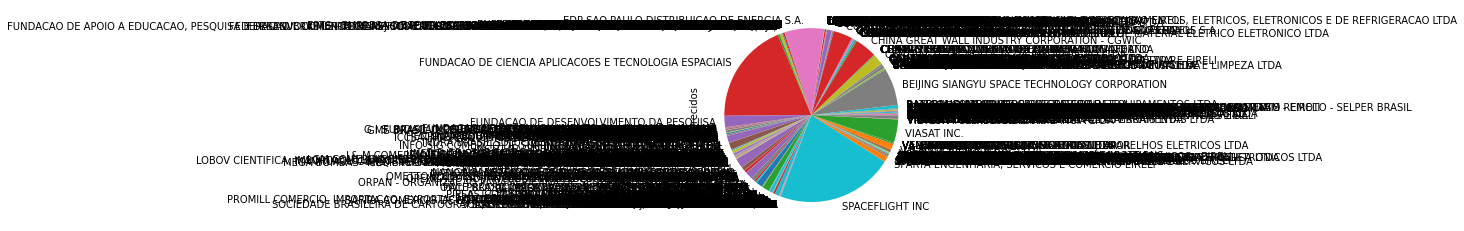

In [89]:
fig , ax = plt.subplots(2,2)
dados_2016 = dados[(dados["Ano"] == '2016')]
dados_2016.groupby("Favorecido")["Pago"].sum().plot.pie()
ax.set_ylabel("Favorecidos")
dados_2017 = dados[(dados["Ano"] == '2017')]
dados_2017.groupby("Favorecido")["Pago"].sum().plot.pie()
ax.set_ylabel("Favorecidos")
dados_2018 = dados[(dados["Ano"] == '2018')]
dados_2018.groupby("Favorecido")["Pago"].sum().plot.pie()
ax.set_ylabel("Favorecidos")
dados_2019 = dados[(dados["Ano"] == '2019')]
dados_2019.groupby("Favorecido")["Pago"].sum().plot.pie()
ax.set_ylabel("Favorecidos")
fig.tight_layout()
plt.show()

## Correlações de execução do orçamento

Por GND
Por tipo de ação (satélites ou lançadores)